In [1]:
import ROOT
from ROOT import TFile, TH1F, TCanvas, TMath,TLine, TH1, TLegend
import copy
import array
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetBarWidth(1);
ROOT.gStyle.SetHistLineWidth(1);
import sys
sys.path.append("/eos/home-x/xuyan/TrijetProj/TrijetAna_Main/ZprimeAna/utiles")
from CMSStyle import CMS_lumi

Welcome to JupyROOT 6.30/02


In [6]:
file1 = TFile.Open(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root")
tree1 = file1.Get("Events")
file2 = TFile.Open(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BdToK0starEE_postEE/myNano_0.root")
tree2 = file2.Get("Events")
file3 = TFile.Open(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/DataF/myNano_0.root")
tree3 = file3.Get("Events")
# tree1.Print()

canvas = TCanvas("canvas", "Title", 1000, 800)
# Create the first histogram for the first plot
hist1 = TH1F("hist1", "nBToKsEE", 15, 0, 15)
canvas.cd()
tree1.Draw("nBToKsEE>>hist1")
# Normalize hist1
if hist1.Integral() > 0:  # Check if the histogram is not empty
    hist1.Scale(1.0 / hist1.Integral())

# Create the second histogram for the second plot
hist2 = TH1F("hist2", "nBToKsEE", 15, 0, 15)
tree2.Draw("nBToKsEE>>hist2")
# Normalize hist2
if hist2.Integral() > 0:  # Check if the histogram is not empty
    hist2.Scale(1.0 / hist2.Integral())
    
# Create the second histogram for the second plot
hist3 = TH1F("hist3", "nBToKsEE", 15, 0, 15)
tree3.Draw("nBToKsEE>>hist3")
# Normalize hist2
if hist3.Integral() > 0:  # Check if the histogram is not empty
    hist3.Scale(1.0 / hist3.Integral())
    
hist1.SetLineColor(2)
hist2.SetLineColor(8)
hist1.Draw("HIST")  # You might want to use hist1.Draw("HIST") to not draw the stats box
hist2.Draw("HIST SAME")  # You might want to use hist2.Draw("HIST") to not draw the stats box
hist3.Draw("HIST SAME")  # You might want to use hist2.Draw("HIST") to not draw the stats box

leg = TLegend(0.6,0.7,0.85,0.85)
leg.AddEntry(hist1,"Kee")
leg.AddEntry(hist2,"K0*ee")
leg.AddEntry(hist3,"Data")
leg.Draw()

# canvas.Update() # This will ensure that the canvas is updated with the new plots
canvas.Draw()

OSError: Failed to open file /eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/DataF/myNano_0.root

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available
Error in <TFile::TFile>: file /eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/DataF/myNano_0.root does not exist


In [11]:
file1 = TFile.Open(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root")
file1.ls()
# hist1 = file1.Get(f"hist1_4")
tree = file1.Get("Events")
# tree.Print()

# canvas = TCanvas("canvas", "Title", 1000, 800)
# canvas.cd()
# hist1.Draw()
# canvas.Draw()

TNetXNGFile**		root://eoshome-i03.cern.ch//eos/user/x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root	
 TNetXNGFile*		root://eoshome-i03.cern.ch//eos/user/x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root	
  KEY: TObjString	tag;1	Collectable string class
  KEY: TTree	Events;1	Events
  KEY: TTree	LuminosityBlocks;1	LuminosityBlocks
  KEY: TTree	Runs;1	Runs
  KEY: TTree	MetaData;1	Job metadata
  KEY: TTree	ParameterSets;1	Parameter sets


In [7]:
file = TFile("Hist_BuToKEE_presel_lowq2.root")
file.ls()
hist1_KEE_list = []
hist2d_KEE_list = []
for i in range(1,37):
    hist = file.Get(f"hist1_{i}")
    hist.Rebin(10)
    print(hist.GetEntries())
    hist.Scale(1.0/hist.GetEntries())
    hist1_KEE_list.append(copy.deepcopy(hist))
    
for i in range(1,2):
    hist = file.Get(f"hist2d_1_{i}")
    hist.Scale(1.0/hist.GetEntries())
    hist2d_KEE_list.append(copy.deepcopy(hist))
    
file = TFile("Hist_BdToK0starEE_presel_lowq2.root")
file.ls()
hist1_K0StarEE_list = []
hist2d_K0StarEE_list = []
for i in range(1,37):
    hist = file.Get(f"hist1_{i}")
    print(hist.GetEntries())
    hist.Rebin(10)
    hist.Scale(1.0/hist.GetEntries())
    hist1_K0StarEE_list.append(copy.deepcopy(hist))
    
for i in range(1,2):
    hist = file.Get(f"hist2d_1_{i}")
    hist.Scale(1.0/hist.GetEntries())
    hist2d_K0StarEE_list.append(copy.deepcopy(hist))
    
file = TFile("Hist_BdToK0starEE_presel_lowq2.root")
hist1_Data_list = []
hist2d_Data_list = []
for i in range(1,37):
    hist = file.Get(f"hist1_{i}")
    hist.Rebin(10)
    hist.Scale(1.0/hist.GetEntries())
    print(hist.GetEntries())
    hist1_Data_list.append(copy.deepcopy(hist))
    
for i in range(1,2):
    hist = file.Get(f"hist2d_1_{i}")
    hist.Scale(1.0/hist.GetEntries())
    hist2d_Data_list.append(copy.deepcopy(hist))

37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
15431.0
TFile**		Hist_BuToKEE_presel_lowq2.root	
 TFile*		Hist_BuToKEE_presel_lowq2.root	
  KEY: TH1F	hist1_1;1	B mass
  KEY: TH1F	hist1_2;1	ll 

37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0
37508.0


Info in <TCanvas::Print>: png file var.png has been created
Info in <TCanvas::Print>: pdf file var.pdf has been created


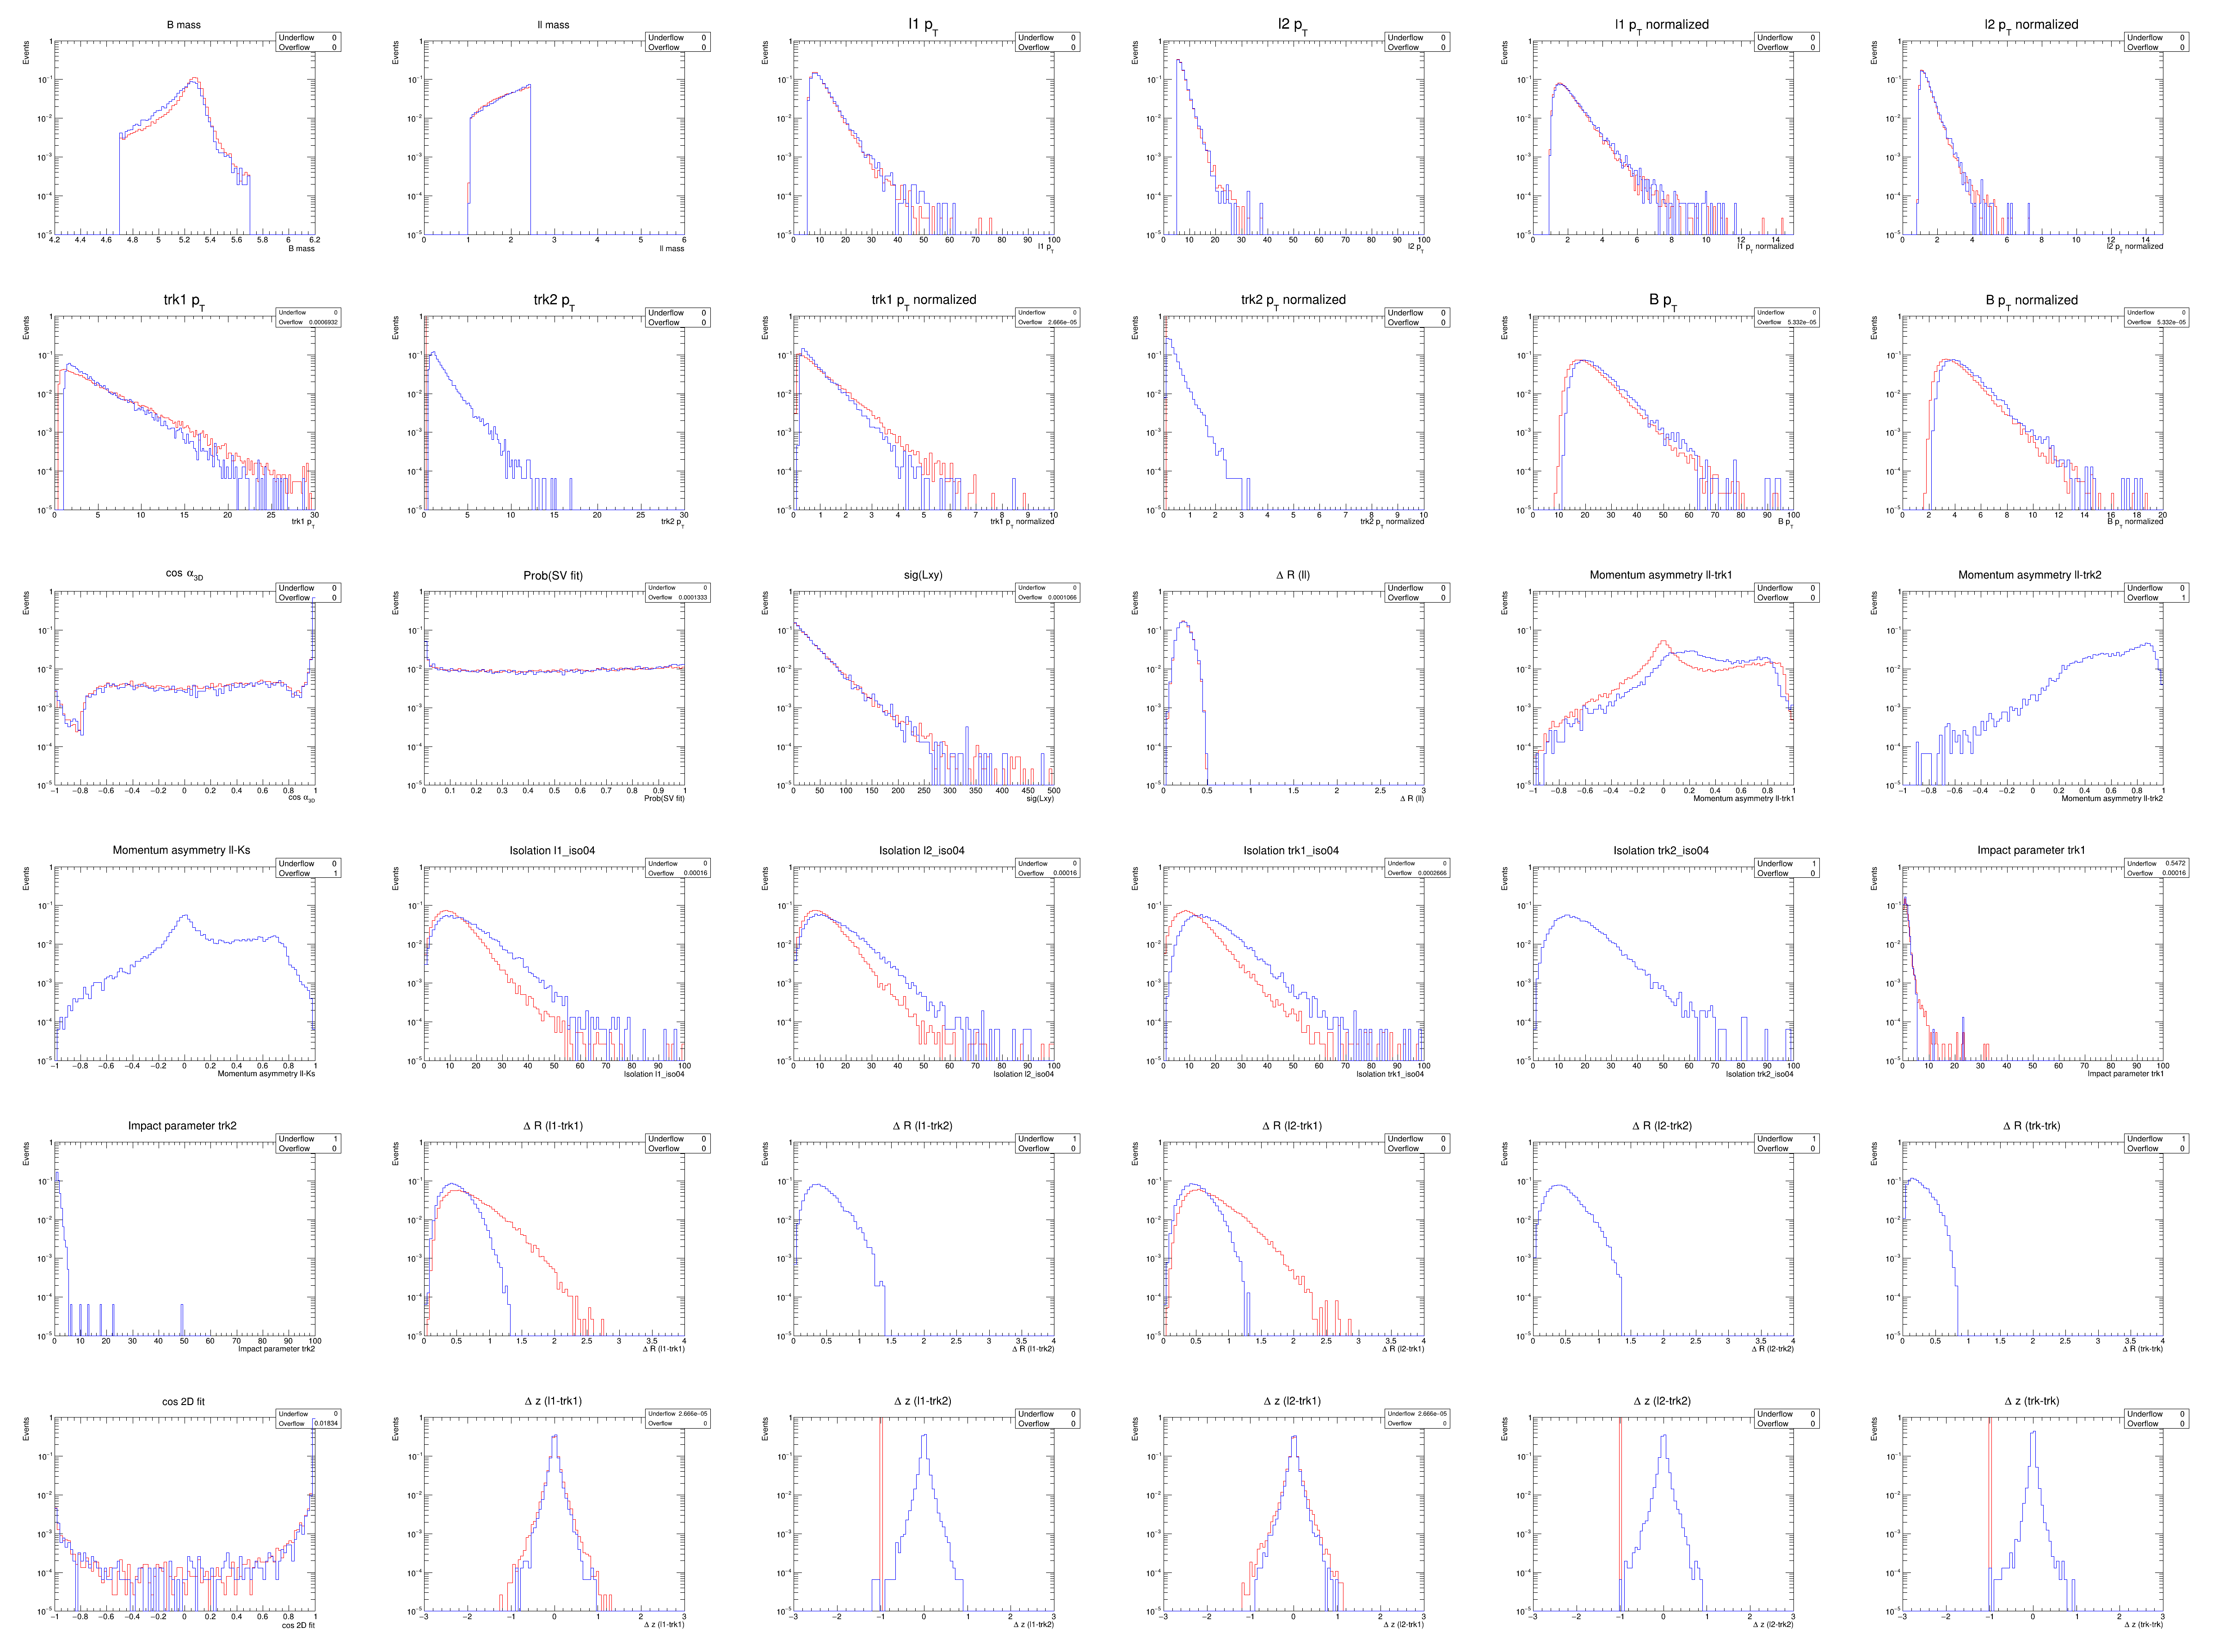

In [8]:
def draw(c0, hist, xTitle, ipad):
    c0.cd(ipad)
    hist.GetYaxis().SetTitle("Events")
    hist.GetYaxis().SetTitleOffset(1.6)
    hist.GetYaxis().SetRangeUser(0.00001,1)
    hist.GetXaxis().SetTitle(xTitle)
    hist.SetTitle(hist.GetTitle())
    hist.SetLineWidth(1)
    hist.Draw("SAME HIST")
    
    gPad.SetLogy()
    
from ROOT import gStyle, TLegend, TPad, gPad
gStyle.SetOptStat(110000)
c0 = TCanvas("","",4800,3600)
c0.cd()
c0.Divide(6,6)

# variable_names = [
#     "m_{B} [GeV]",
#     "m_{ll} [GeV]",
#     "p_{T}^{e1} [GeV]",
#     "p_{T}^{e2} [GeV]",
#     "p_{T}^{e1} (normalized)",
#     "p_{T}^{e2} (normalized)",
#     "p_{T}^{K} [GeV]",
#     "p_{T}^{K} (normalized)",
#     "p_{T}^{B} [GeV]",
#     "p_{T}^{B} (normalized)",
#     "cos #alpha_{3D}",
#     "Probability",
#     "Sig(Lxy)",
#     "#Delta z (e1, K)",
#     "#Delta z (e2, K)",
#     "SigImpactParam(K, ll)",
#     "#Delta R (ee)",
#     "#Delta R (e1, K)",
#     "#Delta R (e2, K)",
#     "Momentum asymmetry",
#     "Electron ID e1",
#     "Electron ID e2",
#     "Isolation l1_iso04_dca [GeV]",
#     "Isolation l1_iso04_dca [GeV]",
#     "Isolation l1_iso04_dca [GeV]"
# ]



for i, hist in enumerate(hist1_KEE_list):
    hist.SetLineColor(2)
    print(hist.GetEntries())
    draw(c0, hist, hist.GetTitle(), i+1)
    
for i, hist in enumerate(hist1_K0StarEE_list):
    hist.SetLineColor(4)
    draw(c0, hist, hist.GetTitle(), i+1)
    
# for i, hist in enumerate(hist1_Data_list):
#     hist.SetLineColor(8)
#     draw(c0, hist, variable_names[i], i+1)

c0.Draw()
c0.Print("var.png")
c0.Print("var.pdf")

In [31]:
from ROOT import gStyle, TLegend
gStyle.SetOptStat(0)
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.7, 0.8, 0.9, 0.9)

leg.AddEntry(hist1_1, "B (all triplets)", "l")
leg.AddEntry(hist1_3, "B (cleaned triplets)", "l")

hist1_1.SetLineColor(4)
hist1_3.SetLineColor(2)

hist1_1.GetYaxis().SetTitle("Events")
hist1_1.GetYaxis().SetTitleOffset(1.6)
hist1_1.GetYaxis().SetRangeUser(0,2000)
# hist5.GetYaxis().SetRangeUser(0,6000)
hist1_1.GetXaxis().SetRangeUser(3.5,7)
hist1_1.GetXaxis().SetTitle("m_{B} [GeV]")
hist1_1.SetTitle("")

hist1_1.Draw("SAME")
hist1_3.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

NameError: name 'hist1_1' is not defined

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.1, 0.8, 0.4, 0.9)

leg.AddEntry(hist1_KEE_list[1], "triplets (KEE)", "l")
leg.AddEntry(hist1_K0StarEE_list[1], "triplets (K0StarEE)", "l")

hist1_KEE_list[1].SetLineColor(4)
hist1_K0StarEE_list[1].SetLineColor(2)

hist1_KEE_list[1].GetYaxis().SetTitle("Events")
hist1_KEE_list[1].GetYaxis().SetTitleOffset(1.6)
hist1_KEE_list[1].GetYaxis().SetRangeUser(0.0000001,1)
# hist5.GetYaxis().SetRangeUser(0,6000)
# hist5.GetXaxis().SetRangeUser(, 4.4)
hist1_KEE_list[1].GetXaxis().SetTitle("m_{ee} [GeV]")
hist1_KEE_list[1].SetTitle(hist1_KEE_list[1].GetTitle())

hist1_KEE_list[1].Draw("HIST")
hist1_K0StarEE_list[1].Draw("HIST SAME")

leg.Draw()

c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()
leg = TLegend(0.1, 0.8, 0.4, 0.9)
leg.AddEntry(hist2_KEE_list[0], "quadruplets (KEE)", "l")
leg.AddEntry(hist2_K0StarEE_list[0], "quadruplets (K0StarEE)", "l")
hist2_KEE_list[0].GetYaxis().SetTitle("Events")
hist2_KEE_list[0].GetYaxis().SetTitleOffset(1.6)
hist2_KEE_list[0].GetYaxis().SetRangeUser(0.00001,1)
hist2_KEE_list[0].GetXaxis().SetTitle("m_{B} [GeV]")
hist2_KEE_list[0].SetTitle(hist2_KEE_list[0].GetTitle())
hist2_KEE_list[0].SetLineColor(2)
hist2_KEE_list[0].Draw("HIST")
hist2_K0StarEE_list[0].Draw("HIST SAME")
leg.Draw()
c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.8, 0.8, 0.9, 0.9)

leg.AddEntry(hist2_2, "K*", "l")

hist2_2.SetLineColor(2)

hist2_2.GetYaxis().SetTitle("Events")
hist2_2.GetYaxis().SetTitleOffset(1.6)
hist2_2.GetYaxis().SetRangeUser(0,2000)
hist2_2.GetXaxis().SetRangeUser(0.6,1.2)
hist2_2.GetXaxis().SetTitle("m_{K*} [GeV]")
hist2_2.SetTitle("")

hist2_2.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.8, 0.8, 0.9, 0.9)

leg.AddEntry(hist1_5, "l1", "l")
leg.AddEntry(hist1_6, "l2", "l")

hist1_5.SetLineColor(2)
hist1_6.SetLineColor(4)

hist1_5.GetYaxis().SetTitle("Events")
hist1_5.GetYaxis().SetTitleOffset(1.6)
hist1_5.GetYaxis().SetRangeUser(0,200)
# hist1_5.GetXaxis().SetRangeUser(0,5)
hist1_5.GetXaxis().SetTitle("pT [GeV]")
hist1_5.SetTitle("")

hist1_5.Draw("SAME")
hist1_6.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1600,900)
c0.cd()

hist2d_KEE_list[0].GetXaxis().SetTitle("L1")
hist2d_KEE_list[0].GetYaxis().SetTitle("HLT")
hist2d_KEE_list[0].SetTitle("")

hist2d_KEE_list[0].Draw("colorz text")

c0.SetLogz()
c0.Draw()